## Step 1 Construct features using NLTK

In [1]:
import nltk
from nltk.corpus import stopwords
import string

import json


# Import works.json: title, words, sentences of 38 pieces
with open('works_v1025.json', 'r') as f:
    try:
        works = json.load(f)
    # if the file is empty the ValueError will be thrown
    except ValueError:
        works = {}


In [2]:
from nltk import FreqDist

def getFreqDist(words):
    nltk_text = nltk.Text(words)
    
    return FreqDist(nltk_text)


In [3]:
def getCountFrequency(words, freq):
    nltk_text = nltk.Text(words)
    freq_dist = FreqDist(nltk_text)
    
    count = 0
    for key,value in freq_dist.items():
        if value == freq:
            count += 1
    
    return count    

def getHapaxLegomena(words):
    return getCountFrequency(words, 1)



In [4]:
def getDisLegomena(words):
    return getCountFrequency(words, 2)


In [5]:
def getNumberUniqueWords(words):
    return len(getFreqDist(words))


In [6]:
def getWordLengthDistribution(words):
    result = FreqDist()
    for w in words:        
        result[len(w)] += 1
    
    return result

def printFreqDist(freq_dist):
    for key,value in freq_dist.items():
        print (key,value)    


In [7]:
def getSentenceLengthDistribution(sents):
    result = FreqDist()
    for s in sents:        
        result[len(s)] += 1
    
    return result   



In [8]:
def getAverageSentenceLength(words_all, sents):
    
    return len(words_all)/len(sents)


In [9]:
def getPronounDistribution(sents):
    result = FreqDist()
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    for s in sents:
        count = 0
        for p in pronouns:
            count += s.count(p)
        result[count] += 1
    
    return result

In [10]:
def getNumberOfPronoun(sentences):
    pronouns = ['I', 'you', 'he', 'she', 'it', 'we', 'you', 'they', 'thou', 'ye']
    count = 0
    for s in sentences:        
        for p in pronouns:
            count += s.count(p)
    
    return count

In [11]:
def getConjunctionDistribution(sents):
    result = FreqDist()
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        count = 0
        for c in conjunctions:
            count += s.count(c)
        result[count] += 1
    
    return result


In [12]:
def getNumberOfConjunction(sents):
    count = 0
    conjunctions = ['for', 'and', 'nor', 'but', 'or', 'yet', 'so', 'after', 'although', 'as', 'because', 'before', 'if',
                'once', 'since', 'though', 'unless', 'until', 'when', 'where', 'while', 'whether', 'either', 'neither',
                'as', 'than', 'even', 'then', 'lest', 'rather', 'which', 'who', 'why', 'that', 'till']
    for s in sents:
        for c in conjunctions:
            count += s.count(c)
    
    return count

In [13]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import division

# Create a feature table for all acts
# Currently only has some simple features

featureTable = {}

featureTable = {'act': [], 'filename': [], 'HapaxLegomena': [], 'DisLegomena': [], 
                'numberUniqueWords': [], 'averageSentenceLength': [], 'numberOfSentences': [],
                'numberOfPronoun': [], 'numberOfConjunction': []}


for act, content in works.items():
    words_nonStemmed = content['words_nonStemmed']
    words_all = content['words_all']
    sentences = content['sentences']
    # Normalize by number of all words
    normalizer = len(words_all)
    featureTable['act'].append(act)
    featureTable['filename'].append(content['filename'])
    featureTable['HapaxLegomena'].append(getHapaxLegomena(words_nonStemmed)/normalizer)
    featureTable['DisLegomena'].append(getDisLegomena(words_nonStemmed)/normalizer)
    featureTable['numberUniqueWords'].append(getNumberUniqueWords(words_nonStemmed)/normalizer)
    featureTable['averageSentenceLength'].append(getAverageSentenceLength(words_all, sentences))
    featureTable['numberOfSentences'].append(len(sentences))
    featureTable['numberOfPronoun'].append(getNumberOfPronoun(sentences)/normalizer)
    featureTable['numberOfConjunction'].append(getNumberOfConjunction(sentences)/normalizer)
        

print(len(featureTable['act']))


df = pd.DataFrame(featureTable)
df.set_index(['act'], inplace=True)
df.head()

223


,DisLegomena,HapaxLegomena,averageSentenceLength,filename,numberOfConjunction,numberOfPronoun,numberOfSentences,numberUniqueWords
act,,,,,,,,
KING RICHARD THE SECOND ACT IV.,0.037343,0.130559,14.260163,27.txt,0.134550,0.203535,246,0.208381
ALLS WELL THAT ENDS WELL ACT IV,0.031667,0.188333,12.000000,2.txt,0.127500,0.205833,100,0.254167
THE MERRY WIVES OF WINDSOR ACT I.,0.025308,0.100112,9.473445,23.txt,0.127983,0.203748,659,0.158097
THE TWO GENTLEMEN OF VERONA ACT III,0.030164,0.109008,11.153132,36.txt,0.140420,0.194924,431,0.172665
KING JOHN ACT V.,0.031367,0.143689,15.298851,16.txt,0.123591,0.183133,348,0.211871


In [14]:
# Filter out wierd acts, e.g. the beginning of a play

# df = df[df['averageSentenceLength'] < 30]
df_2 = df[['numberUniqueWords', 'averageSentenceLength']]
df_3 = df[['numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun']]
df = df[['HapaxLegomena', 'DisLegomena', 'numberUniqueWords', 
        'averageSentenceLength', 'numberOfPronoun', 'numberOfConjunction']]

/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


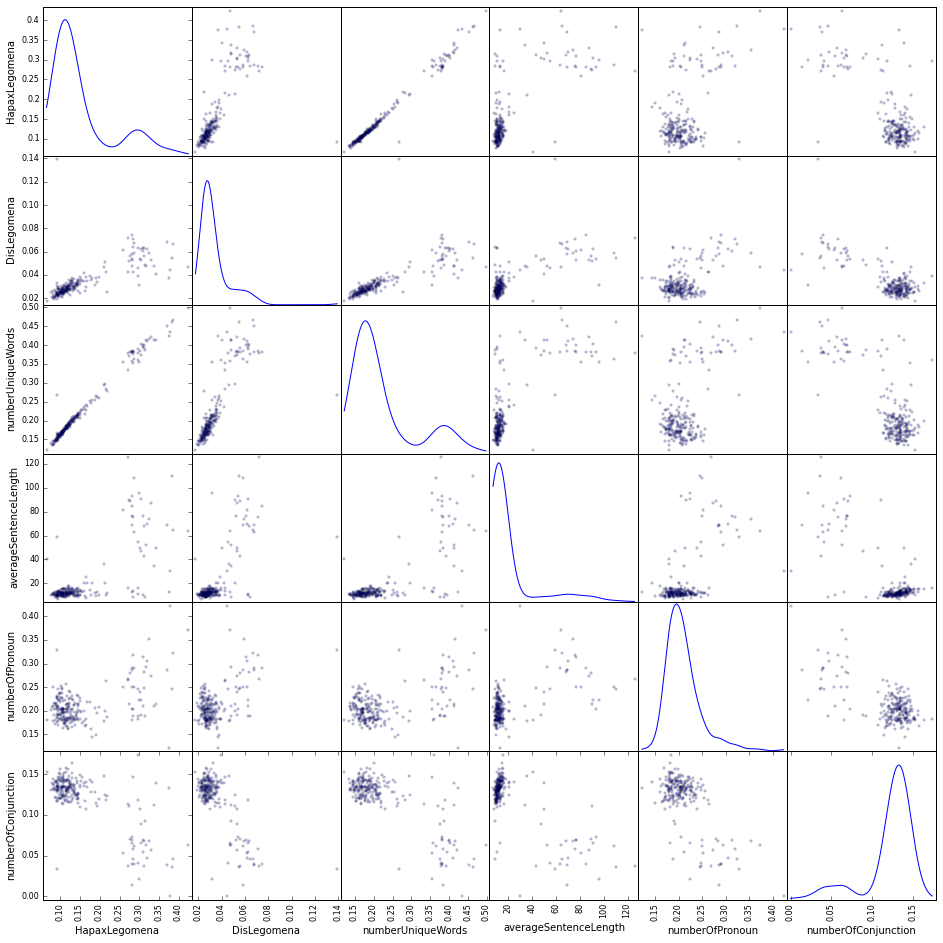

In [15]:
pd.scatter_matrix(df, alpha=0.2, figsize=(16, 16), diagonal='kde')
plt.show()

## Step 2 Construct n-grams using sklearn

In [16]:
title = []
text = []

for act in df.index:
    content = works[act]
    title.append(act)
    text.append(content['text'])


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from __future__ import print_function

from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics

from sklearn.cluster import KMeans, MiniBatchKMeans
import numpy as np

In [18]:
# excluding stop words, n-grams is an input
def getTfidf(ngram_range):
    count_vect = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X_counts = count_vect.fit_transform(text)

    tfidf_transformer = TfidfTransformer(use_idf=True).fit(X_counts)
    X_tfidf = tfidf_transformer.transform(X_counts)
    return X_tfidf

In [19]:
randomState = np.random.seed(1)

def getSVD(X_tfidf, n_components):
    
    svd = TruncatedSVD(n_components = n_components, random_state = randomState)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    X = lsa.fit_transform(X_tfidf)

    explained_variance = svd.explained_variance_ratio_.sum()
    print("Explained variance of the SVD step: {}%".format(
        int(explained_variance * 100)))
    
    return X



In [20]:
# Features from n-grams, use fewer components
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 6)
df_ngrams = pd.DataFrame(data=X, index = title)
df_ngrams.head()

Explained variance of the SVD step: 3%


,0,1,2,3,4,5
KING RICHARD THE SECOND ACT IV.,0.238953,-0.157772,-0.308102,-0.167702,0.134029,0.881473
ALLS WELL THAT ENDS WELL ACT IV,0.872619,-0.098035,0.078169,-0.308208,-0.223626,-0.278952
THE MERRY WIVES OF WINDSOR ACT I.,0.268061,-0.042836,0.132508,0.938733,0.041676,0.160604
THE TWO GENTLEMEN OF VERONA ACT III,0.263579,-0.065269,0.709713,0.017485,0.594927,0.261401
KING JOHN ACT V.,0.675215,0.176713,-0.242517,-0.082188,0.598588,0.298296


## Step 3 Combine n-grams and other features

In [21]:
# Merge all features
df_all = df.join(df_ngrams)
df_all.head()

,HapaxLegomena,DisLegomena,numberUniqueWords,averageSentenceLength,numberOfPronoun,numberOfConjunction,0,1,2,3,4,5
act,,,,,,,,,,,,
KING RICHARD THE SECOND ACT IV.,0.130559,0.037343,0.208381,14.260163,0.203535,0.134550,0.238953,-0.157772,-0.308102,-0.167702,0.134029,0.881473
ALLS WELL THAT ENDS WELL ACT IV,0.188333,0.031667,0.254167,12.000000,0.205833,0.127500,0.872619,-0.098035,0.078169,-0.308208,-0.223626,-0.278952
THE MERRY WIVES OF WINDSOR ACT I.,0.100112,0.025308,0.158097,9.473445,0.203748,0.127983,0.268061,-0.042836,0.132508,0.938733,0.041676,0.160604
THE TWO GENTLEMEN OF VERONA ACT III,0.109008,0.030164,0.172665,11.153132,0.194924,0.140420,0.263579,-0.065269,0.709713,0.017485,0.594927,0.261401
KING JOHN ACT V.,0.143689,0.031367,0.211871,15.298851,0.183133,0.123591,0.675215,0.176713,-0.242517,-0.082188,0.598588,0.298296


## Step 4 Clustering

In [22]:
def clusterDocuments(X, n_clusters):

    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=500, n_init=5, random_state = randomState)
    km.fit_predict(X)    
    return km.labels_

def printClusters(labels):
    for i in set(labels):
        index = np.squeeze(np.argwhere(labels == i)).tolist()
        print(index)
    
        print(np.array(title)[index])
        print('\n')

# Cluster only using n-grams as features
X_tfidf = getTfidf(ngram_range = (2,4))
X = getSVD(X_tfidf, n_components = 20)
labels = clusterDocuments(X, n_clusters = 20)
printClusters(labels)

Explained variance of the SVD step: 10%
[16, 28, 64, 68, 72, 88, 104, 131, 148, 151, 159, 165]
['SECOND PART OF KING HENRY IV ACT IV.'
 'SECOND PART OF KING HENRY IV ACT I. '
 'SECOND PART OF KING HENRY IV ACT III' 'ALLS WELL THAT ENDS WELL ACT II.'
 'THE TAMING OF THE SHREW ACT1594' 'THE TRAGEDY OF CORIOLANUS ACT II.'
 'THE TAMING OF THE SHREW ACT V. ' 'SECOND PART OF KING HENRY IV ACT V. '
 "THE WINTER'S TALE ACT IV." 'SECOND PART OF KING HENRY IV ACT1598'
 'KING RICHARD III ACT III' 'SECOND PART OF KING HENRY IV ACT II.']


[8, 10, 11, 14, 19, 20, 21, 31, 49, 73, 97, 111, 124, 129, 155, 156, 162, 178, 192, 194, 202, 207, 210, 217]
['THE TWO GENTLEMEN OF VERONA ACT_4|S' 'AS YOU LIKE IT ACT1601'
 'THE TRAGEDY OF TITUS ANDRONICUS ACT1594'
 'THE TRAGEDY OF CORIOLANUS ACT1608' 'MUCH ADO ABOUT NOTHING ACT1599'
 'CYMBELINE ACT1609' "THE WINTER'S TALE ACT1611"
 'THE MERCHANT OF VENICE ACT1597'
 'THE HISTORY OF TROILUS AND CRESSIDA ACT1602'
 'THE TRAGEDY OF ROMEO AND JULIET ACT1595'
 'THE LI

> By only using n-grams + td-idf + SVD (20 components), acts are grouped mainly according to their topics. Acts of the same play go to the same cluster.

In [31]:
# Cluster using all features
X = df_all.values
labels = clusterDocuments(X, n_clusters = 8)
printClusters(labels)

[0, 1, 17, 25, 27, 33, 34, 37, 40, 41, 42, 43, 45, 47, 48, 53, 56, 58, 59, 66, 69, 70, 71, 72, 73, 74, 85, 86, 88, 98, 99, 108, 110, 114, 115, 117, 120, 121, 127, 130, 131, 133, 134, 135, 136, 140, 141, 148, 149, 150, 152, 154, 157, 159, 160, 161, 166, 167, 170, 171, 172, 173, 179, 180, 183, 184, 185, 195, 197, 199, 203, 205, 206, 208, 209, 211, 214, 219, 221, 222]
['KING RICHARD THE SECOND ACT IV.' 'ALLS WELL THAT ENDS WELL ACT IV '
 'THE TEMPEST ACT III' 'TWELFTH NIGHT; OR, WHAT YOU WILL ACT V. '
 'THE TRAGEDY OF JULIUS CAESAR ACT I. ' 'ALLS WELL THAT ENDS WELL ACT I. '
 'THE TRAGEDY OF TITUS ANDRONICUS ACT IV.'
 'THE FIRST PART OF HENRY THE SIXTH ACT V. ' 'THE COMEDY OF ERRORS ACT III'
 'THE TAMING OF THE SHREW ACT III'
 'THE SECOND PART OF KING HENRY THE SIXTH ACT V. '
 'THE FIRST PART OF HENRY THE SIXTH ACT II.'
 'THE LIFE OF KING HENRY THE FIFTH ACT III' 'KING RICHARD III ACT V. '
 'THE THIRD PART OF KING HENRY THE SIXTH ACT III'
 'THE LIFE OF KING HENRY THE FIFTH ACT IV.'
 'ALLS

In [45]:
def print2D(X, x_label, y_label, title, labels):
    plt.scatter(X[:,0], X[:,1], c=labels, marker='+', s=100, linewidths=2)
    plt.ylabel(y_label, fontsize=14, fontweight='bold')
    plt.xlabel(x_label, fontsize=14, fontweight='bold')
    plt.title(title, fontsize=14, fontweight='bold')
    xmin = min(X[:,0])
    xmax = max(X[:,0])
    ymin = min(X[:,1])
    ymax = max(X[:,1])
    plt.xlim([xmin, xmax])
    plt.ylim([ymin, ymax])
    plt.show()    


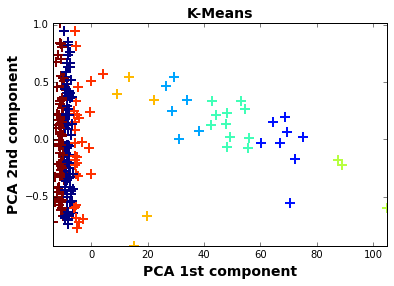

In [40]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_2D_PCA = pca.fit_transform(X)

print2D(X_2D_PCA, 'PCA 1st component', 'PCA 2nd component', 'K-Means', labels)

In [46]:
def print3D(X, x_label, y_label, z_label, title, labels):
    fig = plt.figure(1, figsize=(11, 10))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

    plt.cla()
    
    ax.scatter(X[:, 1], X[:, 0], X[:, 2], c=labels.astype(np.float), s=50)
    ax.dist = 11

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)
    



/Users/byan/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


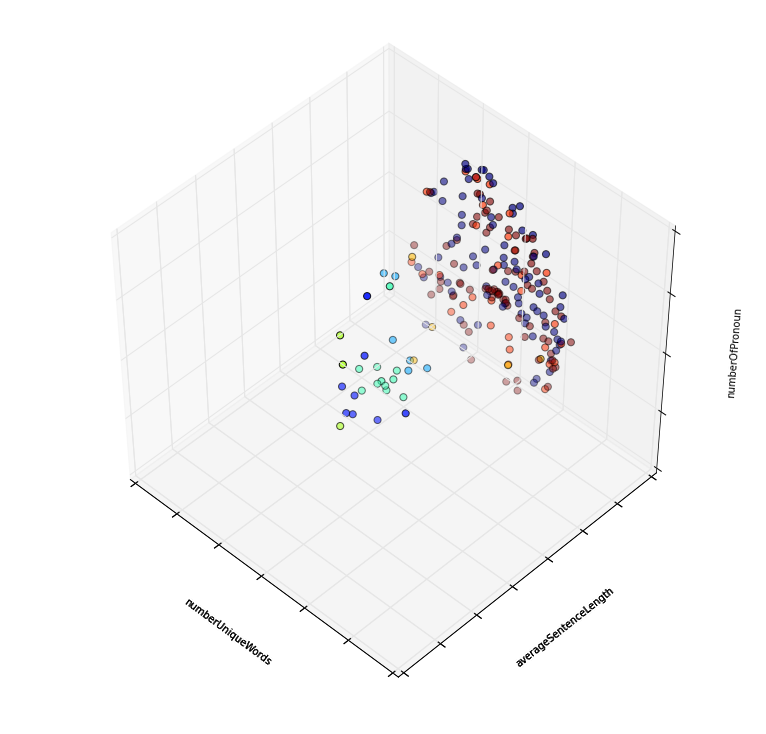

In [47]:
pca = PCA(n_components=3)
X_3D_PCA = pca.fit_transform(X)

print3D(X_3D_PCA, 'numberUniqueWords', 'averageSentenceLength', 'numberOfPronoun', 'title', labels)

In [26]:
df_all.to_excel('all feature-v1027.xlsx')

> By adding the features of average sentence length, number of unique words normalized by total number of words, fequency of conjunctions, and etc., acts are clustered according to the writing style (need to be verified by visualization).